## Perceptron - unipolar vs bipolar

In [1]:
import pandas as pd
from data import *
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
repetitions = 200

In [3]:
estimate_func_unipolar = lambda v: unipolar(0, v)
x_all_unipolar = reproduce_x_times(x_unipolar, repetitions)
d_all_unipolar = reproduce_x_times(d_unipolar, repetitions)
x_all_unipolar = x_all_unipolar + get_random_except_first_row(x_all_unipolar.shape)
x_all_unipolar[:, :5], d_all_unipolar[:, :5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-0.0324065 ,  0.00354204,  0.97330319,  0.96001343, -0.03308896],
        [-0.02002523,  1.04430979, -0.03624719,  1.01315974,  0.00804715]]),
 array([[0, 0, 0, 1, 0]]))

In [4]:
estimate_func_bipolar = lambda v: bipolar(0, v)
x_all_bipolar = reproduce_x_times(x_bipolar, repetitions)
d_all_bipolar = reproduce_x_times(d_bipolar, repetitions)
x_all_bipolar = x_all_bipolar + get_random_except_first_row(x_all_bipolar.shape)
x_all_bipolar[:, :5], d_all_bipolar[:, :5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-0.97630845, -1.01522943,  1.00359499,  0.95285383, -0.95481941],
        [-1.03680277,  0.96505018, -0.96989144,  0.99476067, -1.01343958]]),
 array([[-1, -1, -1,  1, -1]]))

In [5]:
test_size = int(x_all_unipolar.shape[1] * 0.25)
train_size = int(x_all_unipolar.shape[1] - test_size)

In [6]:
x_train_unipolar, x_test_unipolar = x_all_unipolar[:, :train_size], x_all_unipolar[:, train_size:]
d_train_unipolar, d_test_unipolar = d_all_unipolar[:, :train_size], d_all_unipolar[:, train_size:]
x_train_unipolar.shape, x_test_unipolar.shape, d_train_unipolar.shape, d_test_unipolar.shape

((3, 600), (3, 200), (1, 600), (1, 200))

In [7]:
x_train_bipolar, x_test_bipolar = x_all_bipolar[:, :train_size], x_all_bipolar[:, train_size:]
d_train_bipolar, d_test_bipolar = d_all_bipolar[:, :train_size], d_all_bipolar[:, train_size:]
x_train_bipolar.shape, x_test_bipolar.shape, d_train_bipolar.shape, d_test_bipolar.shape

((3, 600), (3, 200), (1, 600), (1, 200))

In [8]:
x_range = np.arange(-2, 4)
experiments_numb = 1000

In [16]:
perceptrons_unipolar = []
perceptrons_bipolar = []
for w_range in list(np.linspace(0, 1, num=100))[1:]:
    p_unipolar = Perceptron(x_train_unipolar, d_train_unipolar, x_test_unipolar, d_test_unipolar, estimate_func_unipolar, 0.1, (-w_range, w_range))
    p_bipolar = Perceptron(x_train_bipolar, d_train_bipolar, x_test_bipolar, d_test_bipolar, estimate_func_bipolar, 0.1, (-w_range, w_range))
    for i in range(experiments_numb):
        p_unipolar.count()
        p_bipolar.count()
    perceptrons_unipolar.append(p_unipolar)
    perceptrons_bipolar.append(p_bipolar)
len(perceptrons_unipolar), len(perceptrons_bipolar)

(99, 99)

,"weights range (-v, v)",epoch count unipolar,epoch count bipolar
0,0.010101,6.990,2.842
1,0.020202,7.021,2.856
2,0.030303,7.146,2.852
3,0.040404,7.169,2.840
4,0.050505,7.107,2.850
...,...,...,...
94,0.959596,6.924,2.833
95,0.969697,6.810,2.844
96,0.979798,6.748,2.855
97,0.989899,6.909,2.845


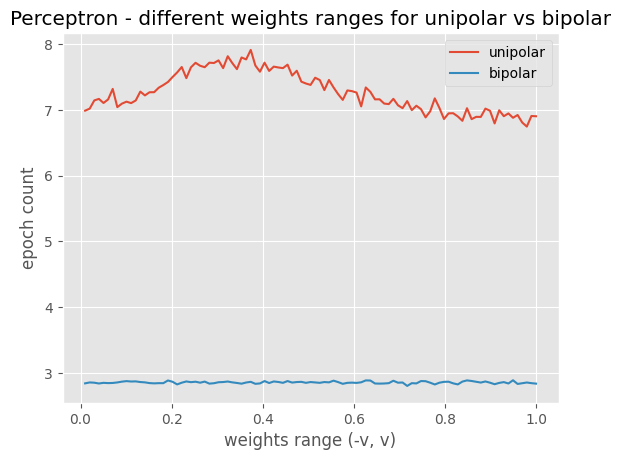

In [17]:
x = [x.wrange[1] for x in perceptrons_unipolar]
y_u = [x.average_epoch_count for x in perceptrons_unipolar]
y_b = [x.average_epoch_count for x in perceptrons_bipolar]
plt.title("Perceptron - different weights ranges for unipolar vs bipolar")
plt.plot(x, y_u, label="unipolar")
plt.plot(x, y_b, label="bipolar")
plt.legend()
plt.xlabel("weights range (-v, v)")
plt.ylabel("epoch count")
# plt.ylim(0, 9)
pd.DataFrame({"weights range (-v, v)":x, "epoch count unipolar":y_u, "epoch count bipolar":y_b})

Średnia ilość epok w zależności od przedziału wag. Przy użyciu bipolarnej funkcji aktywacji można zauważyć, że uczenie się
jest zdecydowanie szybsze.

Dla powyższego wykresu można zauważyć, że 

In [11]:
perceptrons_unipolar = []
perceptrons_bipolar = []
for alfa in list(np.linspace(0, 1, num=100))[1:]:
    p_unipolar = Perceptron(x_train_unipolar, d_train_unipolar, x_test_unipolar, d_test_unipolar, estimate_func_unipolar, alfa, (-0.1, 0.1))
    p_bipolar = Perceptron(x_train_bipolar, d_train_bipolar, x_test_bipolar, d_test_bipolar, estimate_func_bipolar, alfa, (-0.1, 0.1))
    for i in range(experiments_numb):
        p_unipolar.count()
        p_bipolar.count()
    perceptrons_unipolar.append(p_unipolar)
    perceptrons_bipolar.append(p_bipolar)
len(perceptrons_unipolar), len(perceptrons_bipolar)

(99, 99)

,α,epoch count unipolar,epoch count bipolar
0,0.010101,6.681,2.867
1,0.020202,7.455,2.822
2,0.030303,7.816,2.826
3,0.040404,7.666,2.858
4,0.050505,7.388,2.869
...,...,...,...
94,0.959596,7.049,2.847
95,0.969697,7.179,2.833
96,0.979798,7.047,2.867
97,0.989899,6.970,2.850


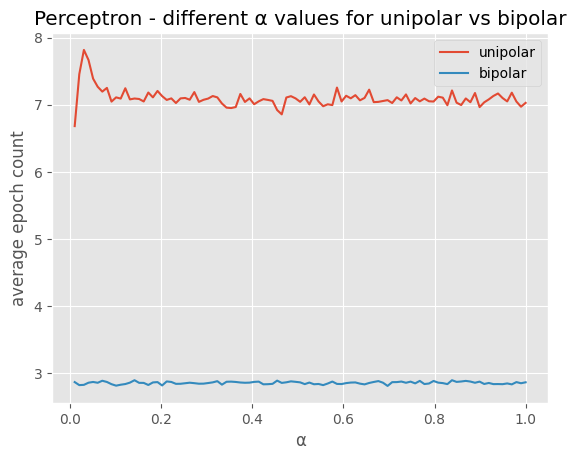

In [14]:
x = [x.alfa for x in perceptrons_unipolar]
y_u = [x.average_epoch_count for x in perceptrons_unipolar]
y_b = [x.average_epoch_count for x in perceptrons_bipolar]
plt.title("Perceptron - different α values for unipolar vs bipolar")
plt.plot(x, y_u, label="unipolar")
plt.plot(x, y_b, label="bipolar")
plt.xlabel("α")
plt.ylabel("average epoch count")
# plt.ylim(0, 9)
plt.legend()
pd.DataFrame({"α": x,
              "epoch count unipolar": y_u,
              "epoch count bipolar": y_b})